In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('../data/am_pm.csv')
df.columns = ['dels', 'date',	'am',	'pm',	'target',	'predict']
df.drop('dels', inplace=True, axis=1)
df.head()

,date,am,pm,target,predict
0,2020-04-17,21.0,2.0,working_day,weekend
1,2020-04-18,1.0,68.0,weekend,working_day
2,2020-04-19,18.0,15.0,weekend,working_day
3,2020-04-20,2.0,23.0,working_day,working_day
4,2020-04-21,0.0,25.0,working_day,working_day


In [3]:

X = df[['am', 'pm']].values
y = df['target'].values
logreg = LogisticRegression(random_state=21, fit_intercept=False)
logreg.fit(X, y)

LogisticRegression(fit_intercept=False, random_state=21)

In [4]:
x_plot = np.array([min(df['am']) - 2, max(df['am']) + 2])
y_plot = (-1 / logreg.coef_[0][1]) * logreg.coef_[0][0] * x_plot
ds1 = df[df.target == 'working_day']
ds2 = df[df.target == 'weekend']

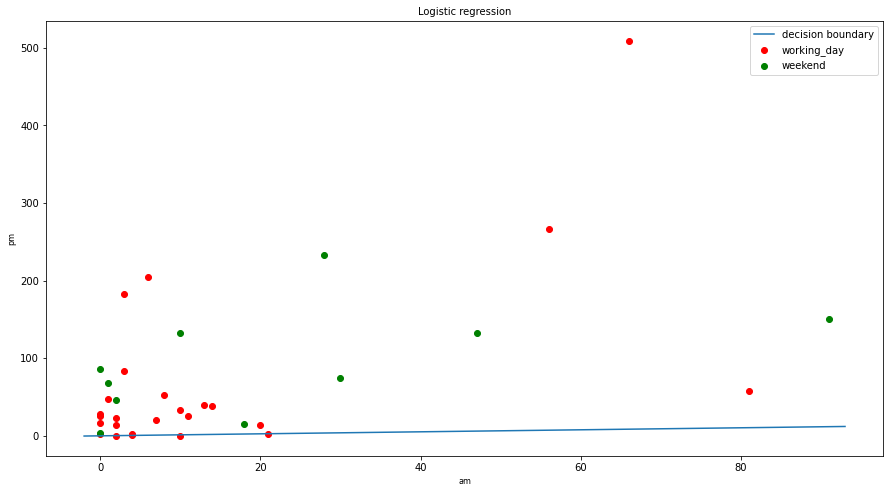

In [5]:
fig, ax = plt.subplots(figsize=(15, 8))
scatter = ax.scatter(ds1['am'], ds1['pm'], c= 'red', label = 'working_day')
scatter = ax.scatter(ds2['am'], ds2['pm'], c= 'green', label = 'weekend')
ax.plot(x_plot, y_plot, label='decision boundary')
ax.legend()
ax.set_title('Logistic regression', fontsize='10')
ax.set_xlabel('am', fontsize='8')
ax.set_ylabel('pm', fontsize='8')
plt.show()

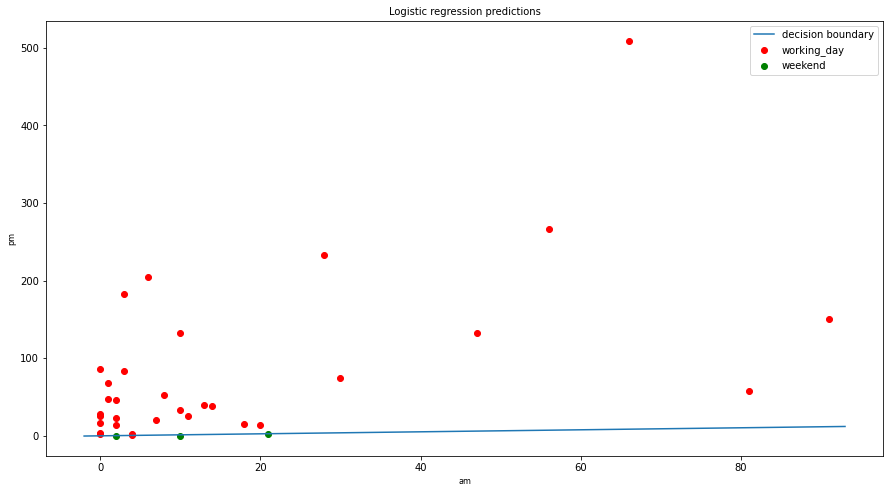

In [6]:
ds1 = df[df.predict == 'working_day']
ds2 = df[df.predict == 'weekend']
fig, ax = plt.subplots(figsize=(15, 8))
scatter = ax.scatter(ds1['am'], ds1['pm'], c= 'red', label = 'working_day')
scatter = ax.scatter(ds2['am'], ds2['pm'], c= 'green', label = 'weekend')
ax.plot(x_plot, y_plot, label='decision boundary')
ax.legend()
ax.set_title('Logistic regression predictions', fontsize='10')
ax.set_xlabel('am', fontsize='8')
ax.set_ylabel('pm', fontsize='8')
plt.show()

In [7]:
scaler = StandardScaler()
df[['am', 'pm']] = scaler.fit_transform(X)
df.head()

,date,am,pm,target,predict
0,2020-04-17,0.200690,-0.719904,working_day,weekend
1,2020-04-18,-0.655914,-0.071822,weekend,working_day
2,2020-04-19,0.072199,-0.592251,weekend,working_day
3,2020-04-20,-0.613084,-0.513696,working_day,working_day
4,2020-04-21,-0.698744,-0.494057,working_day,working_day


In [8]:
X = df[['am', 'pm']]
logreg = LogisticRegression(random_state=21, fit_intercept=False)
logreg.fit(X, y)
pred = logreg.predict(X)
df['predict'] = pred
df.head()

,date,am,pm,target,predict
0,2020-04-17,0.200690,-0.719904,working_day,working_day
1,2020-04-18,-0.655914,-0.071822,weekend,working_day
2,2020-04-19,0.072199,-0.592251,weekend,working_day
3,2020-04-20,-0.613084,-0.513696,working_day,working_day
4,2020-04-21,-0.698744,-0.494057,working_day,working_day


In [9]:
accuracy_score(y, pred)

0.7428571428571429

In [10]:
x_plot = np.array([round(min(df['am']), 1), round(max(df['am']), 1)])
y_plot = (-1 / logreg.coef_[0][1]) * logreg.coef_[0][0] * x_plot

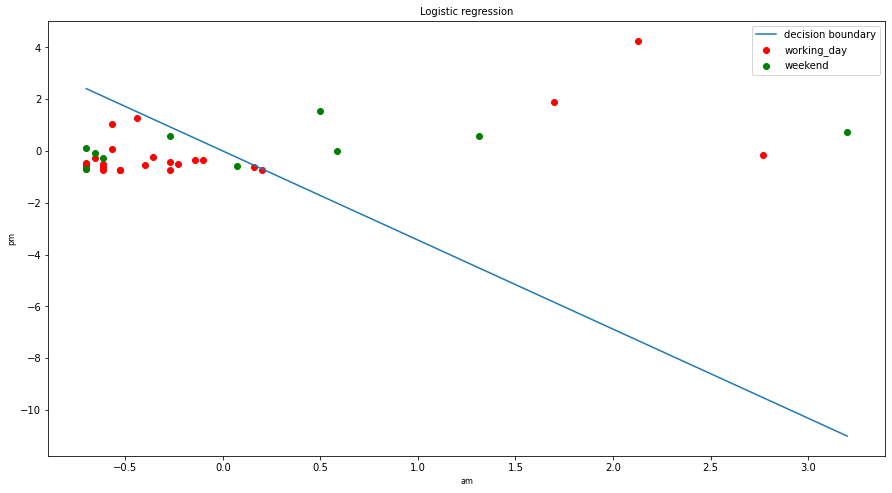

In [11]:
ds1 = df[df.target == 'working_day']
ds2 = df[df.target == 'weekend']
fig, ax = plt.subplots(figsize=(15, 8))
scatter = ax.scatter(ds1['am'], ds1['pm'], c= 'red', label = 'working_day')
scatter = ax.scatter(ds2['am'], ds2['pm'], c= 'green', label = 'weekend')
ax.plot(x_plot, y_plot, label='decision boundary')
ax.legend()
ax.set_title('Logistic regression', fontsize='10')
ax.set_xlabel('am', fontsize='8')
ax.set_ylabel('pm', fontsize='8')
plt.show()

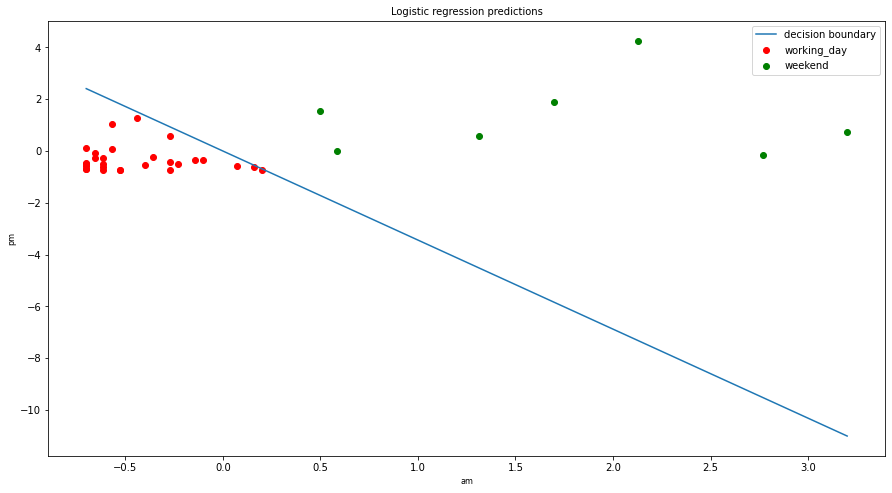

In [12]:
ds1 = df[df.predict == 'working_day']
ds2 = df[df.predict == 'weekend']
fig, ax = plt.subplots(figsize=(15, 8))
scatter = ax.scatter(ds1['am'], ds1['pm'], c= 'red', label = 'working_day')
scatter = ax.scatter(ds2['am'], ds2['pm'], c= 'green', label = 'weekend')
ax.plot(x_plot, y_plot, label='decision boundary')
ax.legend()
ax.set_title('Logistic regression predictions', fontsize='10')
ax.set_xlabel('am', fontsize='8')
ax.set_ylabel('pm', fontsize='8')
plt.show()

svc_model = SVC(probability=True, random_state=21,kernel='linear')
svc_model.fit(X, y)
pred = svc_model.predict(X)
accuracy_score(y, pred)
0.7142857142857143

svc_model = SVC(probability=True, random_state=21,kernel='sigmoid')
svc_model.fit(X, y)
pred = svc_model.predict(X)
accuracy_score(y, pred)
0.6857142857142857

svc_model = SVC(probability=True, random_state=21,kernel='poly')
svc_model.fit(X, y)
pred = svc_model.predict(X)
accuracy_score(y, pred)
0.7428571428571429

In [13]:
svc_model = SVC(probability=True, random_state=21,kernel='rbf')
svc_model.fit(X, y)
pred = svc_model.predict(X)
accuracy_score(y, pred)

0.7428571428571429

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


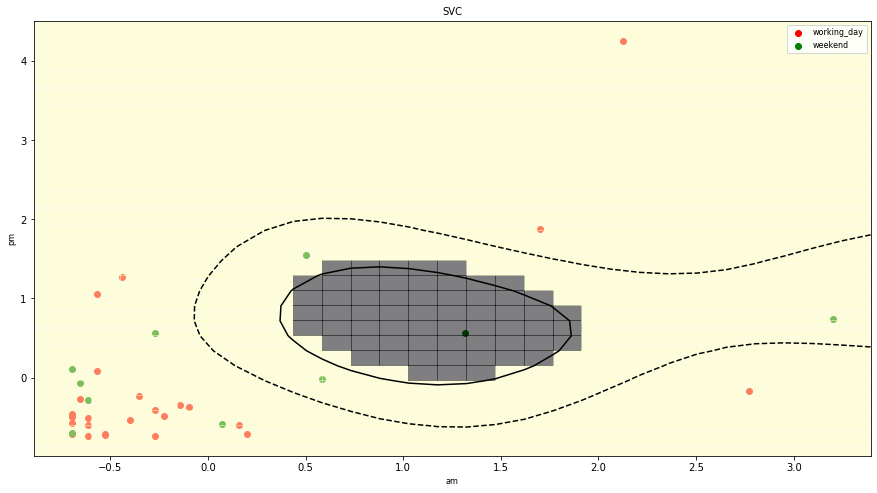

In [14]:
ds1 = df[df.target == 'working_day']
ds2 = df[df.target == 'weekend']
fig, ax = plt.subplots(figsize=(15, 8))
scatter = ax.scatter(ds1['am'], ds1['pm'], c= 'red', label = 'working_day')
scatter = ax.scatter(ds2['am'], ds2['pm'], c= 'green', label = 'weekend')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc_model.decision_function(xy).reshape(XX.shape)
ax.pcolormesh(XX, YY, Z > 0, alpha=0.5, cmap='magma')
ax.contour(XX, YY, Z, colors='k', levels=[-0.5, 0, 0.5],
           linestyles=['--', '-', '--'])
ax.set_title('SVC', fontsize='10')
ax.set_xlabel('am', fontsize='8')
ax.set_ylabel('pm', fontsize='8')
ax.legend(loc='best', fontsize='8')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


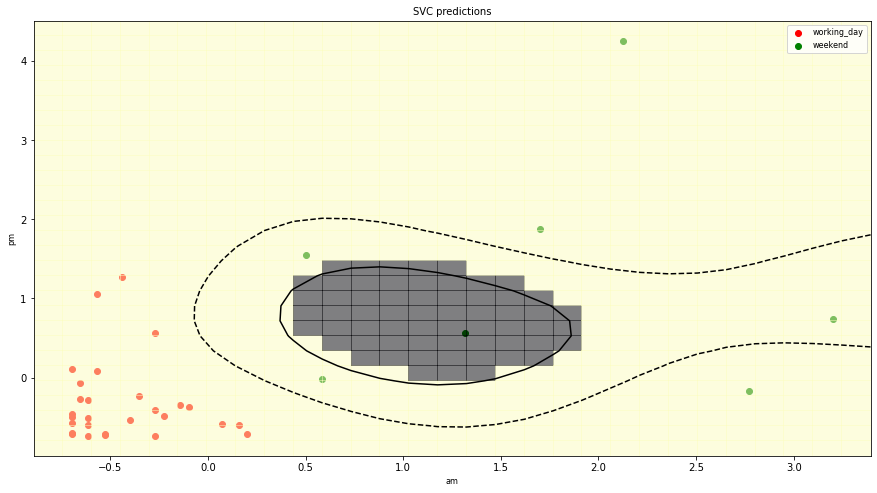

In [15]:
ds1 = df[df.predict == 'working_day']
ds2 = df[df.predict == 'weekend']
fig, ax = plt.subplots(figsize=(15, 8))
scatter = ax.scatter(ds1['am'], ds1['pm'], c= 'red', label = 'working_day')
scatter = ax.scatter(ds2['am'], ds2['pm'], c= 'green', label = 'weekend')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc_model.decision_function(xy).reshape(XX.shape)
ax.pcolormesh(XX, YY, Z > 0, alpha=0.5, cmap='magma')
ax.contour(XX, YY, Z, colors='k', levels=[-0.5, 0, 0.5], linestyles=['--', '-', '--'])
ax.set_title('SVC predictions', fontsize='10')
ax.set_xlabel('am', fontsize='8')
ax.set_ylabel('pm', fontsize='8')
ax.legend(loc='best', fontsize='8')
plt.show()

In [16]:
tree_model = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_model.fit(X, y)
pred = tree_model.predict(X)
accuracy_score(y, pred)

1.0

In [17]:
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X, y)
pred = tree_model.predict(X)
accuracy_score(y, pred)

0.9714285714285714

In [18]:
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X, y)
pred = tree_model.predict(X)
accuracy_score(y, pred)

0.8857142857142857

In [19]:
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X, y)
pred = tree_model.predict(X)
accuracy_score(y, pred)

0.9428571428571428

In [20]:
df['predict'] = pred
df.head()

,date,am,pm,target,predict
0,2020-04-17,0.200690,-0.719904,working_day,working_day
1,2020-04-18,-0.655914,-0.071822,weekend,weekend
2,2020-04-19,0.072199,-0.592251,weekend,working_day
3,2020-04-20,-0.613084,-0.513696,working_day,working_day
4,2020-04-21,-0.698744,-0.494057,working_day,working_day


In [21]:
accuracy_score(y, [df['target'].max()] * len(y))

0.7142857142857143

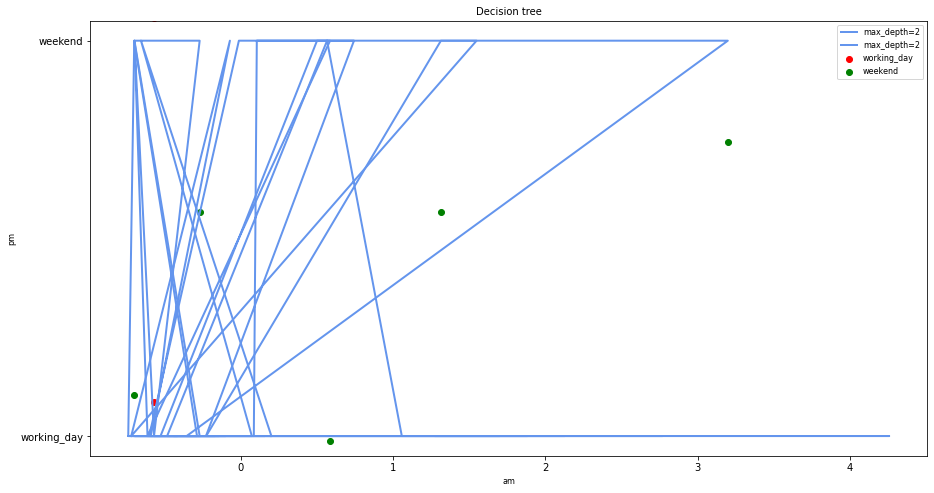

In [22]:
ds1 = df[df.target == 'working_day']
ds2 = df[df.target == 'weekend']
fig, ax = plt.subplots(figsize=(15, 8))
scatter = ax.scatter(ds1['am'], ds1['pm'], c= 'red', label = 'working_day')
scatter = ax.scatter(ds2['am'], ds2['pm'], c= 'green', label = 'weekend')
y = tree_model.predict(X)
plt.plot(X, y, color="cornflowerblue", label="max_depth=2", linewidth=2)
ax.set_title('Decision tree', fontsize='10')
ax.set_xlabel('am', fontsize='8')
ax.set_ylabel('pm', fontsize='8')
ax.legend(loc='best', fontsize='8')
plt.show()

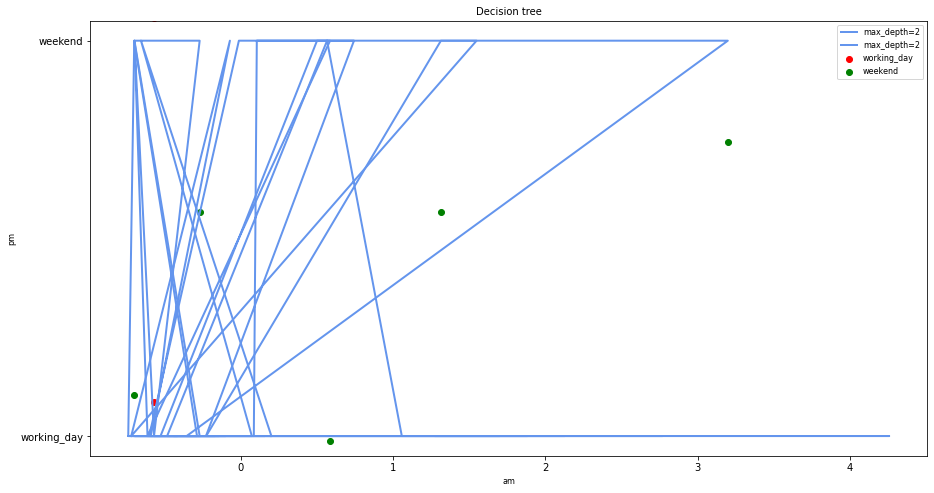

In [23]:
ds1 = df[df.predict == 'working_day']
ds2 = df[df.predict == 'weekend']
fig, ax = plt.subplots(figsize=(15, 8))
scatter = ax.scatter(ds1['am'], ds1['pm'], c= 'red', label = 'working_day')
scatter = ax.scatter(ds2['am'], ds2['pm'], c= 'green', label = 'weekend')
y = tree_model.predict(X)
plt.plot(X, y, color="cornflowerblue", label="max_depth=2", linewidth=2)
ax.set_title('Decision tree', fontsize='10')
ax.set_xlabel('am', fontsize='8')
ax.set_ylabel('pm', fontsize='8')
ax.legend(loc='best', fontsize='8')
plt.show()

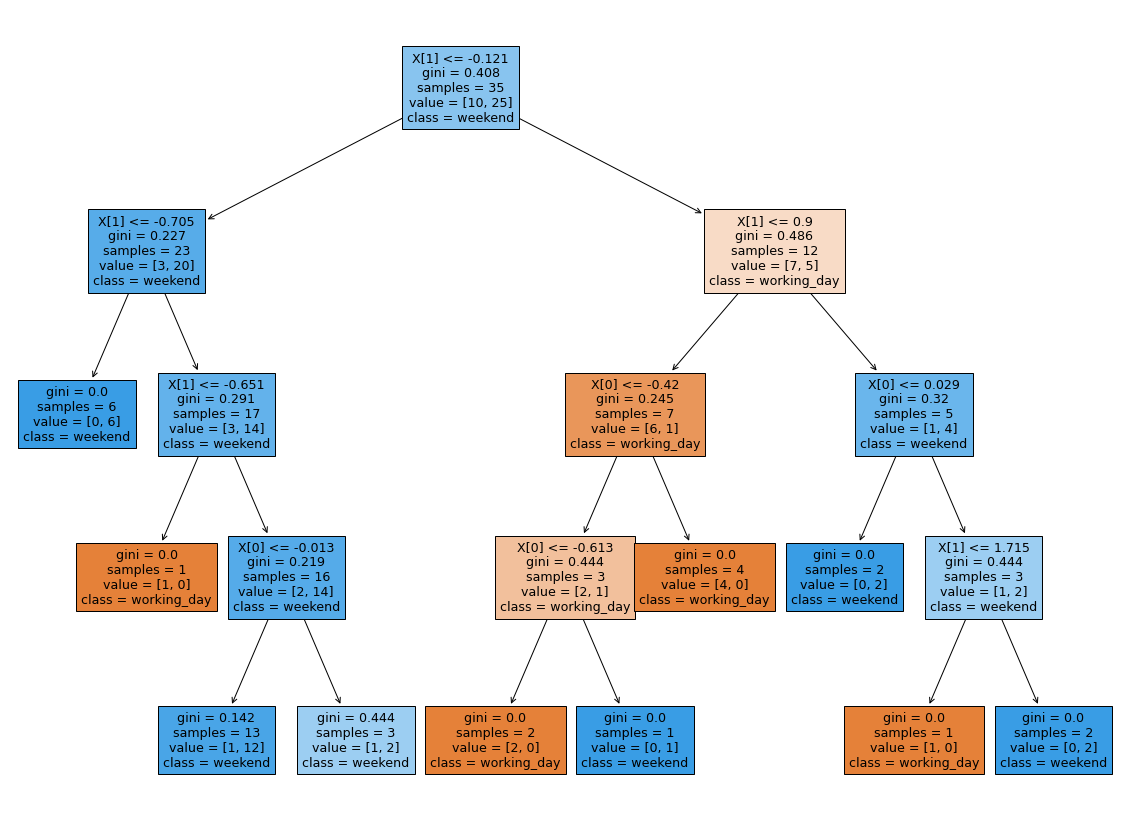

In [24]:
fig, ax = plt.subplots(figsize=(20, 15))
plot_tree(tree_model,
          class_names=['working_day', 'weekend'],
          filled=True, ax=ax)
plt.show()

leaves predict days as working days - 4